In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing Data
dataset1 = pd.read_csv(r'net32Top1ReadyForML.csv')
dataset1 = dataset1.set_index('date')

In [4]:
# Removing the first 7 days from the data set
dataset1 = dataset1.iloc[7:,:]
dataset1

,Profit_3MD-712-036,Avg. return on sales_3MD-712-036,7dayRosAverage,7dayRosAverage*100,Distinct count of order id_3MD-712-036,quantity_3MD-712-036,7DaySumOfQTY,profitPerQuantitySold_3MD-712-036,profitPerOrderMade_3MD-712-036,amazonTop1ItemAvg.weeklyReturn,amazonTop1ItemAvg.weeklyReturn*100,Prediction_3MD-712-036
date,,,,,,,,,,,,
2019-01-08,490,0.7420,0.108100,108.0,2,4,1.0,122,245,0.277271,277.0,0.0
2019-01-09,245,0.7420,0.214100,214.0,2,2,5.0,122,122,0.322714,323.0,0.0
2019-01-10,122,0.7420,0.320100,320.0,1,1,7.0,122,122,0.323186,323.0,0.0
2019-01-11,122,0.7420,0.426100,426.0,1,1,8.0,122,122,0.321400,321.0,1.0
2019-01-12,0,0.0000,0.532100,532.0,0,0,9.0,0,0,0.324443,324.0,1.0
2019-01-13,0,0.0000,0.532100,532.0,0,0,9.0,0,0,0.277214,277.0,1.0
2019-01-14,0,0.0000,0.532100,532.0,0,0,9.0,0,0,0.230643,231.0,1.0
2019-01-15,245,0.7420,0.424000,424.0,1,2,8.0,122,245,0.232043,232.0,1.0
2019-01-16,0,0.0000,0.424000,424.0,0,0,6.0,0,0,0.186600,187.0,1.0


In [5]:
for i in dataset1.columns:
    if i == '7dayRosAverage'   or i == 'Avg. return on sales_3MD-712-036'\
    or i == 'amazonTop1ItemAvg.weeklyReturn' :
        continue
    dataset1[f"{i}"] = dataset1[f"{i}"].astype(np.int64) 

In [7]:
X = dataset1.iloc[:,[0,6]].values
y = dataset1.iloc[:,-1].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42) 
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 0
 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 1]


In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0, 22],
       [ 0, 54]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


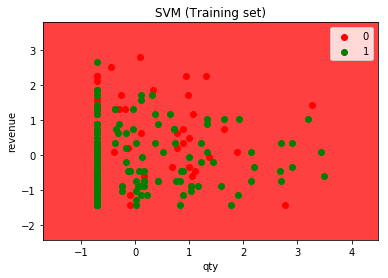

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('qty')
plt.ylabel('revenue')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


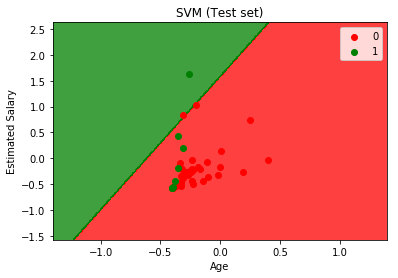

In [9]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()